In [26]:
# note for the data source
"""
Data downloaded from "https://www.cdc.gov/cancer/uscs/dataviz/download_data.htm"
USCS-1999-2017

US population = 326,072,594
(as of 12/31/2017)
https://www.census.gov/popclock/

This Data has a total of 383,848,110.
I have to assume that the difference is of the mixed race, but the number is the population of all US residents.

"""
# import modules

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# loading data from "cancer_1999-2017.csv" generated in "11.5-CapstoneTwo_DataCleaning.ipynb" 

data = pd.read_csv("cancer_1999-2017.csv", index_col = False)


In [28]:
# extracing 2017 data for this analysis

data = data[data['YEAR'] == 2017]
data.head(50)

,Unnamed: 0,YEAR,SITE,RACE,SEX,COUNT,POPULATION
7719,7719,2017,Acute Lymphocytic,Asian/Pacific Islander,Female,24,10999800
7720,7720,2017,Acute Lymphocytic,Asian/Pacific Islander,Male,35,10130807
7721,7721,2017,Acute Lymphocytic,Black,Female,57,23807887
7722,7722,2017,Acute Lymphocytic,Black,Male,66,21980769
7723,7723,2017,Acute Lymphocytic,Hispanic,Female,150,29050132
7724,7724,2017,Acute Lymphocytic,Hispanic,Male,212,29650857
7725,7725,2017,Acute Lymphocytic,White,Female,585,127878578
7726,7726,2017,Acute Lymphocytic,White,Male,752,125664614
7727,7727,2017,Acute Myeloid,American Indian/Alaska Native,Female,24,2335226
7728,7728,2017,Acute Myeloid,American Indian/Alaska Native,Male,19,2349440


In [29]:
# checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 7719 to 8175
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  457 non-null    int64 
 1   YEAR        457 non-null    int64 
 2   SITE        457 non-null    object
 3   RACE        457 non-null    object
 4   SEX         457 non-null    object
 5   COUNT       457 non-null    int64 
 6   POPULATION  457 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 28.6+ KB


In [30]:
# dropping columns no longer needed

del data["Unnamed: 0"]
del data["YEAR"]         



In [31]:
data.head()

,SITE,RACE,SEX,COUNT,POPULATION
7719,Acute Lymphocytic,Asian/Pacific Islander,Female,24,10999800
7720,Acute Lymphocytic,Asian/Pacific Islander,Male,35,10130807
7721,Acute Lymphocytic,Black,Female,57,23807887
7722,Acute Lymphocytic,Black,Male,66,21980769
7723,Acute Lymphocytic,Hispanic,Female,150,29050132


In [32]:
# grouping data by 'SITE' and 'RACE' and aggregate 'COUNT' and 'POPULATION'

data.set_index('SITE')
df_race = data.groupby(['SITE', 'RACE']).sum(['COUNT', 'POPULATION']).reset_index()

In [33]:
df_race.head()

,SITE,RACE,COUNT,POPULATION
0,Acute Lymphocytic,Asian/Pacific Islander,59,21130607
1,Acute Lymphocytic,Black,123,45788656
2,Acute Lymphocytic,Hispanic,362,58700989
3,Acute Lymphocytic,White,1337,253543192
4,Acute Myeloid,American Indian/Alaska Native,43,4684666


In [34]:
# generate a list of Cancer Types ('SITE')

df_race3 = df_race[['SITE', 'RACE', 'COUNT']]
race = df_race3['RACE'].unique()


In [35]:
# filter df for the Top12 Cancer Types (SITE) within each RACE 

top12_race = [[df_race3[df_race3['RACE']== race[i]].sort_values('COUNT', ascending = False).head(12)] for i in range(len(race))]
top12_race

[[                                 SITE                    RACE  COUNT
  98                  Lung and Bronchus  Asian/Pacific Islander   3926
  30                   Colon and Rectum  Asian/Pacific Islander   1824
  93   Liver and Intrahepatic Bile Duct  Asian/Pacific Islander   1668
  187                          Pancreas  Asian/Pacific Islander   1424
  35             Colon excluding Rectum  Asian/Pacific Islander   1394
  56                      Female Breast  Asian/Pacific Islander   1365
  119                     Miscellaneous  Asian/Pacific Islander   1121
  230                           Stomach  Asian/Pacific Islander    966
  87                          Leukemias  Asian/Pacific Islander    683
  103                         Lymphomas  Asian/Pacific Islander    674
  133              Non-Hodgkin Lymphoma  Asian/Pacific Islander    652
  200                          Prostate  Asian/Pacific Islander    620],
 [                                 SITE   RACE  COUNT
  99                 

In [36]:
# group data for Top 12 Cancer Types ('SITE') for all races and sort in descending order
# previous Top 12 by race is referenced to see if Top 12 for all races are not too far off from the Top 12 for each race.

top12_cancer = df_race3.groupby('SITE').sum('COUNT').reset_index()

In [37]:
top12_cancer = top12_cancer.sort_values('COUNT', ascending = False).head(15)
top12_cancer.head(20)

,SITE,COUNT
24,Lung and Bronchus,151301
7,Colon and Rectum,56655
46,Pancreas,47079
29,Miscellaneous,45339
8,Colon excluding Rectum,45048
13,Female Breast,44983
50,Prostate,32497
23,Liver and Intrahepatic Bile Duct,30632
21,Leukemias,25288
25,Lymphomas,23169


In [38]:
# there are a redundant columns like "Colon and Rectum" vs "Colon excluding Rectum", and a column like "Miscellaneous"
# those are excluded from the dataset

exclude_list = ['Miscellaneous', 'Female Breast, <i>in situ</i>', 'Oral Cavity and Pharynx', 'Colon excluding Rectum', 'Non-Hodgkin Lymphoma']

top12_cancer_list = top12_cancer['SITE']
top12_cancer_list = [i for i in top12_cancer_list if i not in exclude_list]

* TOP 12 cancer list for all US and/or each ethnic groups are pretty much the same.
Therefore, I will be using the overall Top 12 cancer list to proceed with the analysis.

In [39]:
top12_cancer_list

['Lung and Bronchus',
 'Colon and Rectum',
 'Pancreas',
 'Female Breast',
 'Prostate',
 'Liver and Intrahepatic Bile Duct',
 'Leukemias',
 'Lymphomas',
 'Urinary Bladder',
 'Esophagus',
 'Ovary',
 'Kidney and Renal Pelvis']

In [40]:
# Top 12 cancer statistics by Cancer and Race in 2017

filter = df_race['SITE'].isin(top12_cancer_list)
df_2017 = df_race[filter]

# Ratio of cancer death is calculated by "# of cancer death devided by population for the race group"
# multiplied the result by 1,000 to make it easier to analyze

df_2017 = df_2017[['RACE', 'SITE', 'COUNT', 'POPULATION']].sort_values(['RACE', 'SITE'])
df_2017['RATIO'] = df_2017['COUNT'] / df_2017['POPULATION'] * 1000



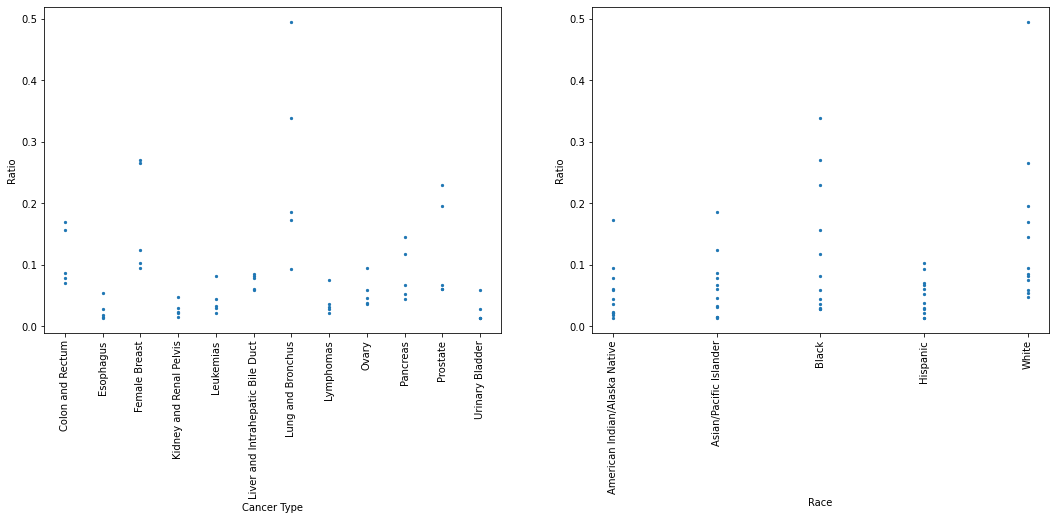

In [41]:
# plotted the ratio by the Cancer Type ('SITE') and RACE.

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
df_2017.plot.scatter(x = 'SITE', y = 'RATIO', marker = '.', ax = axes[0],subplots=True)
_ = plt.sca(axes[0])
_ = plt.xlabel('Cancer Type')
_ = plt.ylabel('Ratio')
_ = plt.xticks(rotation='vertical')


df_2017.plot.scatter(x = 'RACE', y = 'RATIO', marker = '.', ax = axes[1],subplots=True)
_ = plt.sca(axes[1])
_ = plt.xlabel('Race')
_ = plt.ylabel('Ratio')
_ = plt.xticks(rotation='vertical')

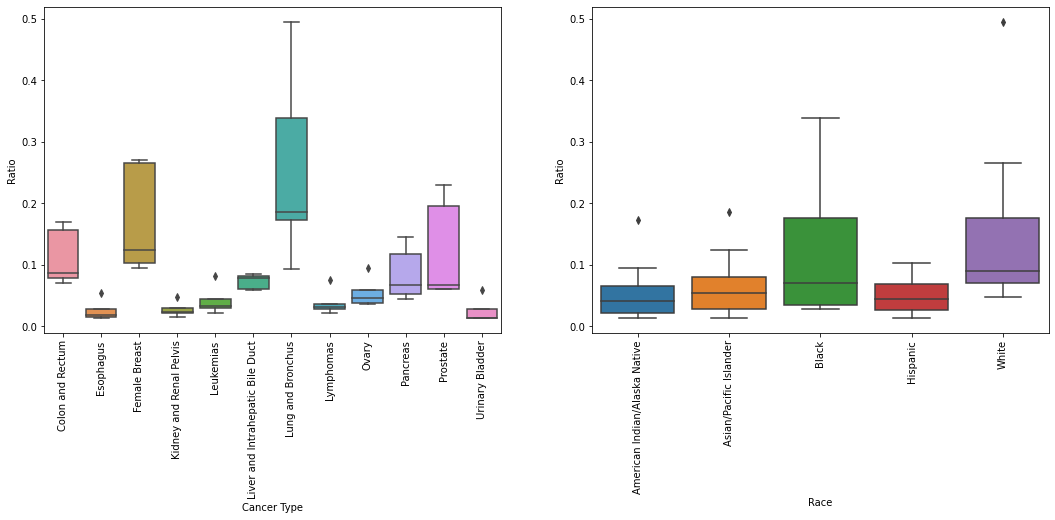

In [42]:
# creating boxplots (ratio by the Cancer Type ('SITE') and RACE) 
# for further analysis (including extent of data and outliers)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.boxplot(x = 'SITE', y = 'RATIO', data=df_2017, ax = axes[0])
_ = plt.sca(axes[0])
plt.xlabel('Cancer Type')
plt.ylabel('Ratio')
plt.xticks(rotation='vertical')

sns.boxplot(x = 'RACE', y = 'RATIO', data=df_2017, ax = axes[1])
_ = plt.sca(axes[1])
plt.xlabel('Race')
plt.ylabel('Ratio')
plt.xticks(rotation='vertical')

plt.show()



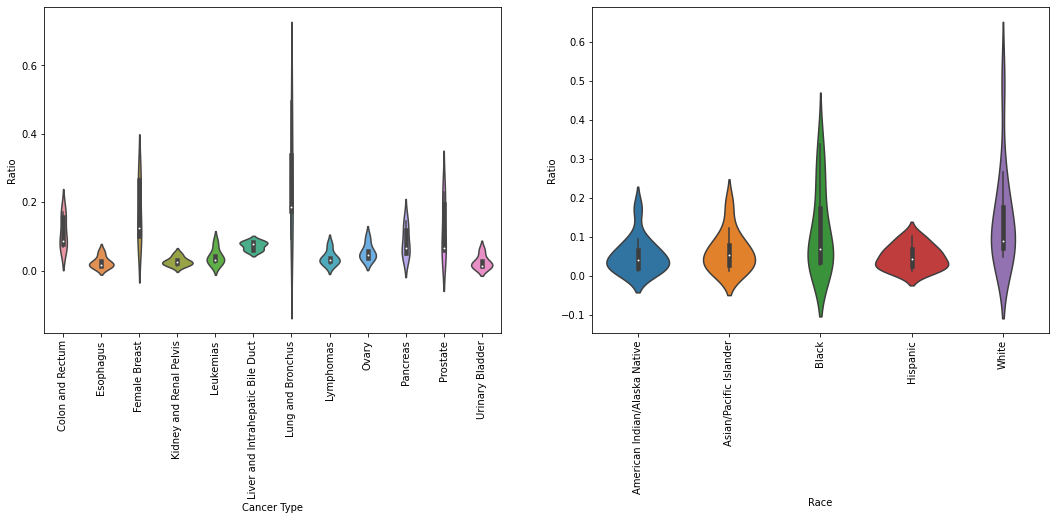

In [43]:
# creating violin plots (ratio by the Cancer Type ('SITE') and RACE) 
# for further analysis (including extent of data and density)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.violinplot(x = 'SITE', y = 'RATIO', data=df_2017, ax = axes[0])
_ = plt.sca(axes[0])
plt.xlabel('Cancer Type')
plt.ylabel('Ratio')
plt.xticks(rotation='vertical')

sns.violinplot(x = 'RACE', y = 'RATIO', data=df_2017, ax = axes[1])
_ = plt.sca(axes[1])
plt.xlabel('Race')
plt.ylabel('Ratio')
plt.xticks(rotation='vertical')

plt.show()

In [44]:
# creating a pivot to alter the chart horizonally for further analysis

df_pivot = df_2017.pivot(index = 'RACE', columns = 'SITE', values = 'RATIO')
df_pivot

SITE,Colon and Rectum,Esophagus,Female Breast,Kidney and Renal Pelvis,Leukemias,Liver and Intrahepatic Bile Duct,Lung and Bronchus,Lymphomas,Ovary,Pancreas,Prostate,Urinary Bladder
RACE,,,,,,,,,,,,
American Indian/Alaska Native,0.079195,0.017717,0.094209,0.024121,0.022200,0.059769,0.173545,0.020919,0.036827,0.045041,0.061291,0.014089
Asian/Pacific Islander,0.086320,0.015049,0.124093,0.014813,0.032323,0.078938,0.185797,0.031897,0.045819,0.067390,0.061199,0.013771
Black,0.157441,0.027605,0.269953,0.030488,0.044159,0.082575,0.339342,0.036668,0.059014,0.117562,0.230429,0.027867
Hispanic,0.069982,0.012981,0.102685,0.021328,0.029999,0.060101,0.092877,0.028977,0.038107,0.052265,0.067823,0.013697
White,0.170160,0.053861,0.265783,0.047870,0.081714,0.084305,0.495269,0.075005,0.095387,0.145904,0.196213,0.059256


In [45]:
df = df_pivot.reset_index()
df = df.set_index('RACE')
df


SITE,Colon and Rectum,Esophagus,Female Breast,Kidney and Renal Pelvis,Leukemias,Liver and Intrahepatic Bile Duct,Lung and Bronchus,Lymphomas,Ovary,Pancreas,Prostate,Urinary Bladder
RACE,,,,,,,,,,,,
American Indian/Alaska Native,0.079195,0.017717,0.094209,0.024121,0.022200,0.059769,0.173545,0.020919,0.036827,0.045041,0.061291,0.014089
Asian/Pacific Islander,0.086320,0.015049,0.124093,0.014813,0.032323,0.078938,0.185797,0.031897,0.045819,0.067390,0.061199,0.013771
Black,0.157441,0.027605,0.269953,0.030488,0.044159,0.082575,0.339342,0.036668,0.059014,0.117562,0.230429,0.027867
Hispanic,0.069982,0.012981,0.102685,0.021328,0.029999,0.060101,0.092877,0.028977,0.038107,0.052265,0.067823,0.013697
White,0.170160,0.053861,0.265783,0.047870,0.081714,0.084305,0.495269,0.075005,0.095387,0.145904,0.196213,0.059256


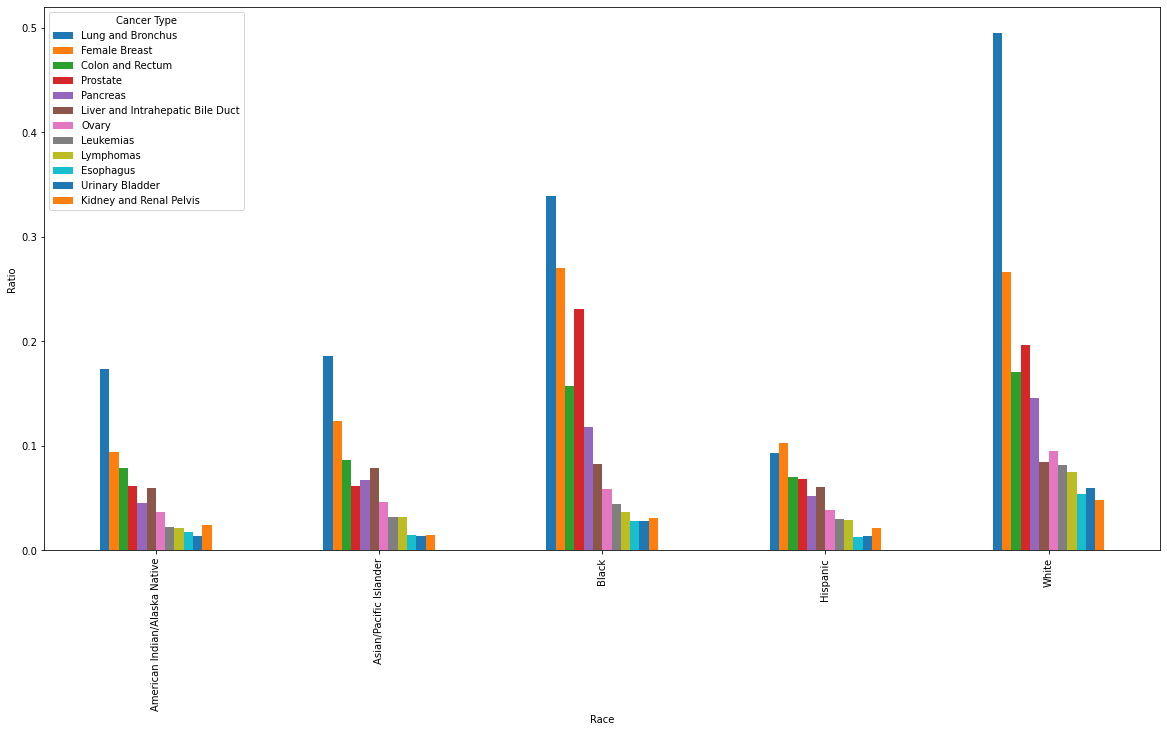

In [46]:
# changing the order of data to make it easier to see
# charting the ratio of Top 12 cancer types in each race group

df[['Lung and Bronchus', 'Female Breast', 'Colon and Rectum','Prostate', 'Pancreas', 'Liver and Intrahepatic Bile Duct', 'Ovary', 'Leukemias', 'Lymphomas', 'Esophagus','Urinary Bladder', 'Kidney and Renal Pelvis']].plot(kind='bar', figsize=(20,10))
plt.legend(title="Cancer Type", loc = 2)
_ = plt.xlabel("Race")
_ = plt.ylabel('Ratio')
plt.show()

In [47]:
# change df format to be able to create the equivalent chart by cancer type

df2 = df.T
df2 = df2.reset_index('SITE')

In [48]:
df2.rename(columns = {'SITE':'CancerType', 0:'American Indian/Alaska Native',1:'Asian/Pacific Islander',2:'Black',3:'Hispanic',4:'White'}, inplace = True)
df2 = df2.drop(0)
df2 = df2.set_index('CancerType')


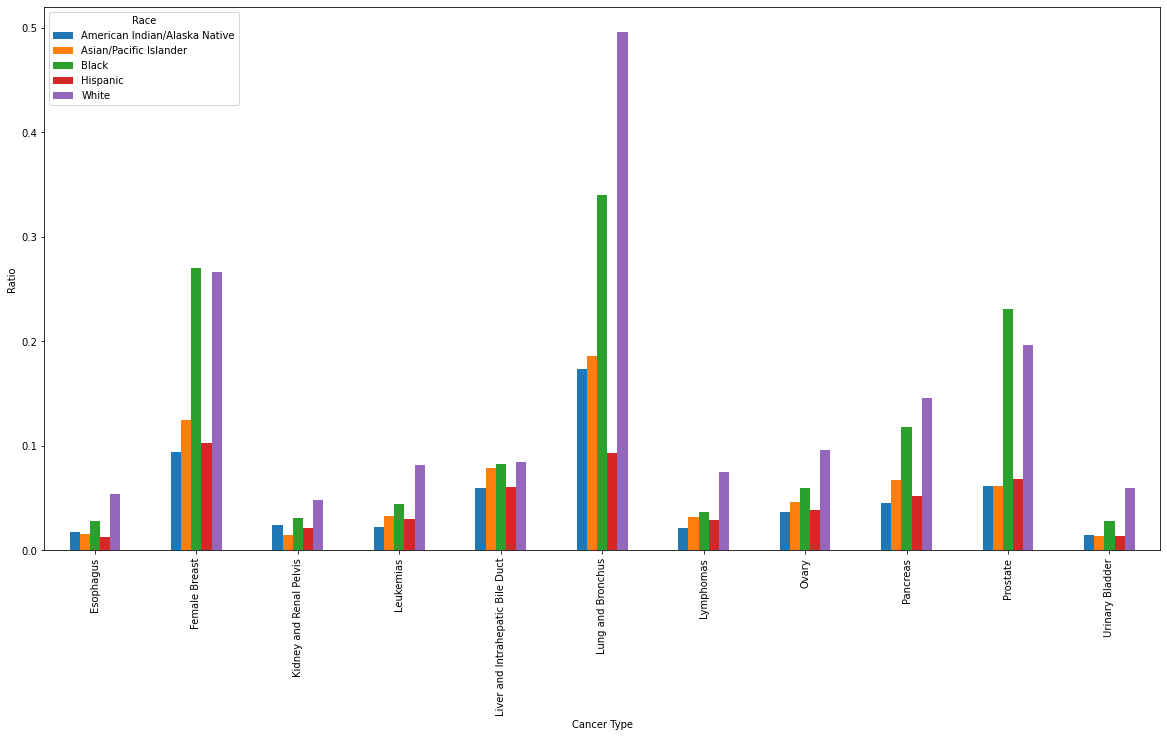

In [49]:
# charting the ratio of the race group in each Top 12 cancer types

df2[['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black', 'Hispanic', 'White']].plot(kind = 'bar', figsize=(20,10))
plt.legend(title="Race", loc = 2)
_ = plt.xlabel("Cancer Type")
_ = plt.ylabel('Ratio')
plt.show()

<AxesSubplot:xlabel='SITE', ylabel='SITE'>

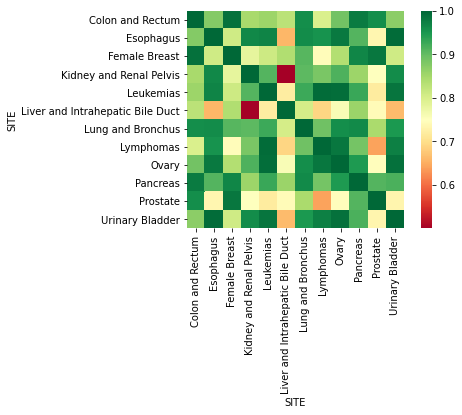

In [50]:
# heatmap to show if there is any correlation

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')